In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/ds-mahbub/Exploratory-Data-Analysis/main/redwine.csv')

In [ ]:
print("Dataset shape:", data.shape)

Dataset shape: (1599, 12)


In [ ]:
print("\nColumn names:", data.columns)


Column names: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
print("\nData types:\n", data.dtypes)


Data types:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [ ]:
print("\nStatistical summary:\n")
data.describe()


Statistical summary:



fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
#Handle missing values (if any)
print("\nMissing values:\n")
data.isnull().sum()


Missing values:



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#Analyze target variable
quality_counts = data['quality'].value_counts()
print("\nQuality counts:\n")
quality_counts


Quality counts:



5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

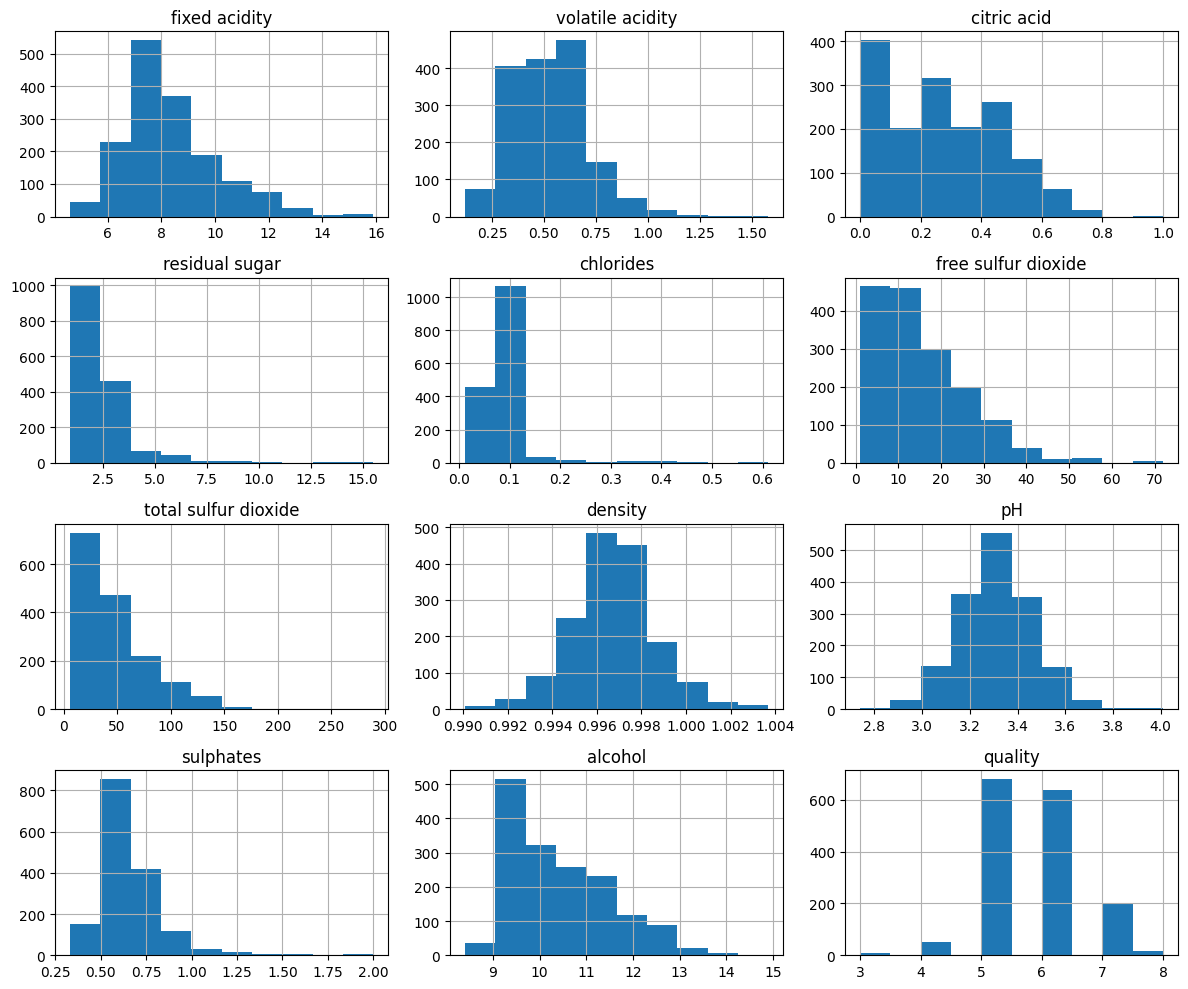

In [ ]:
#Visualize the features
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(1359, 12)

In [ ]:
# Step 8: Find and handle outliers

# Method 1: Z-score
from scipy import stats
z_scores = np.abs(stats.zscore(data))
outliers_zscore = data[(z_scores > 3).any(axis=1)]
data_clean_zscore = data[(z_scores <= 3).all(axis=1)]
print("Outliers found using Z-score method:\n")
outliers_zscore

Outliers found using Z-score method:



fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
13              7.8             0.610         0.29             1.6      0.114   
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
17              8.1             0.560         0.28             1.7      0.368   
19              7.9             0.320         0.51             1.8      0.341   
...             ...               ...          ...             ...        ...   
1478            7.1             0.875         0.05             5.7      0.082   
1505            6.7             0.760         0.02             1.8      0.078   
1558            6.9             0.630         0.33             6.7      0.235   
1574            5.6             0.310         0.78            13.9      0.074   
1589            6.6             0.725         0.20             7.8      0.073   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
13                    9.0                  29.0  0.99740  3.26       1.56   
14                   52.0                 145.0  0.99860  3.16       0.88   
15                   51.0                 148.0  0.99860  3.17       0.93   
17                   16.0                  56.0  0.99680  3.11       1.28   
19                   17.0                  56.0  0.99690  3.04       1.08   
...                   ...                   ...      ...   ...        ...   
1478                  3.0                  14.0  0.99808  3.40       0.52   
1505                  6.0                  12.0  0.99600  3.55       0.63   
1558                 66.0                 115.0  0.99787  3.22       0.56   
1574                 23.0                  92.0  0.99677  3.39       0.48   
1589                 29.0                  79.0  0.99770  3.29       0.54   

      alcohol  quality  
13       9.10        5  
14       9.20        5  
15       9.20        5  
17       9.30        5  
19       9.20        6  
...       ...      ...  
1478    10.20        3  
1505     9.95        3  
1558     9.50        5  
1574    10.50        6  
1589     9.20        5  

[127 rows x 12 columns]

In [ ]:
print("\nCleaned dataset after removing outliers using Z-score method:\n")
data_clean_zscore


Cleaned dataset after removing outliers using Z-score method:



fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
5         9.4        5  
...       ...      ...  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  
1598     11.0        6  

[1232 rows x 12 columns]

In [ ]:
# Method 2: IQR (Interquartile Range)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_clean_iqr = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nOutliers found using IQR method:\n")
outliers_iqr


Outliers found using IQR method:



fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
9               7.5             0.500         0.36             6.1      0.071   
13              7.8             0.610         0.29             1.6      0.114   
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
17              8.1             0.560         0.28             1.7      0.368   
...             ...               ...          ...             ...        ...   
1570            6.4             0.360         0.53             2.2      0.230   
1571            6.4             0.380         0.14             2.2      0.038   
1574            5.6             0.310         0.78            13.9      0.074   
1577            6.2             0.700         0.15             5.1      0.076   
1589            6.6             0.725         0.20             7.8      0.073   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
9                    17.0                 102.0  0.99780  3.35       0.80   
13                    9.0                  29.0  0.99740  3.26       1.56   
14                   52.0                 145.0  0.99860  3.16       0.88   
15                   51.0                 148.0  0.99860  3.17       0.93   
17                   16.0                  56.0  0.99680  3.11       1.28   
...                   ...                   ...      ...   ...        ...   
1570                 19.0                  35.0  0.99340  3.37       0.93   
1571                 15.0                  25.0  0.99514  3.44       0.65   
1574                 23.0                  92.0  0.99677  3.39       0.48   
1577                 13.0                  27.0  0.99622  3.54       0.60   
1589                 29.0                  79.0  0.99770  3.29       0.54   

      alcohol  quality  
9        10.5        5  
13        9.1        5  
14        9.2        5  
15        9.2        5  
17        9.3        5  
...       ...      ...  
1570     12.4        6  
1571     11.1        6  
1574     10.5        6  
1577     11.9        6  
1589      9.2        5  

[354 rows x 12 columns]

In [ ]:
print("\nCleaned dataset after removing outliers using IQR method:\n")
data_clean_iqr


Cleaned dataset after removing outliers using IQR method:



fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
5         9.4        5  
...       ...      ...  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  
1598     11.0        6  

[1005 rows x 12 columns]

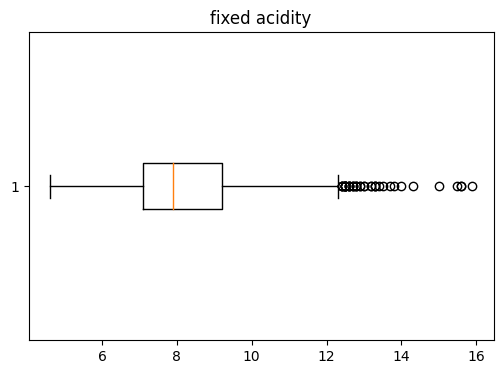

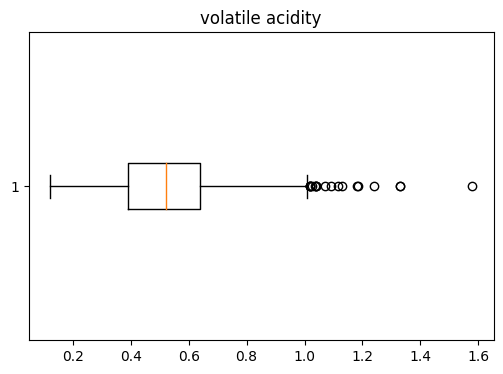

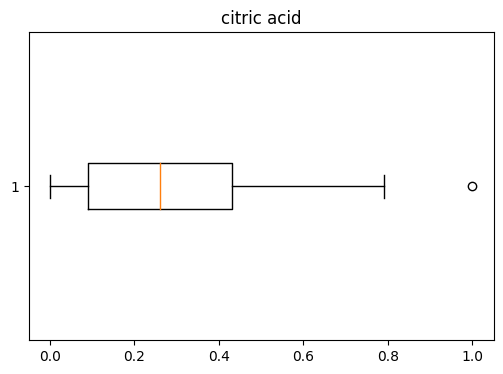

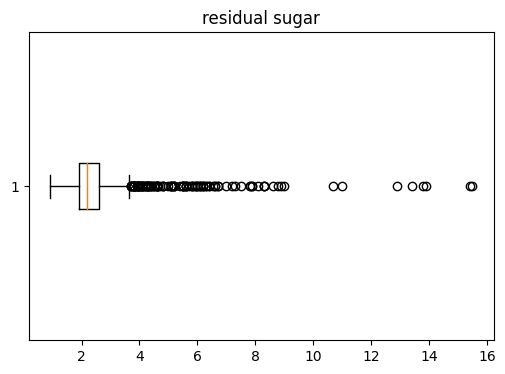

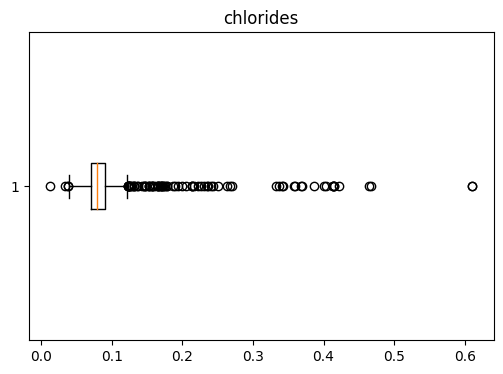

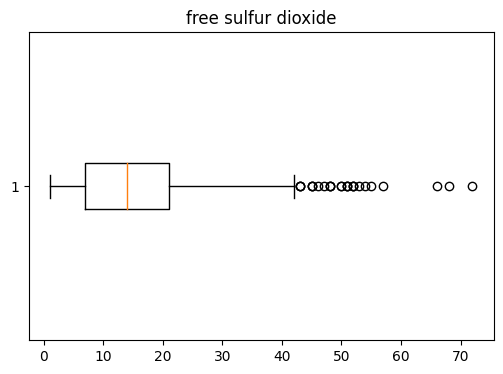

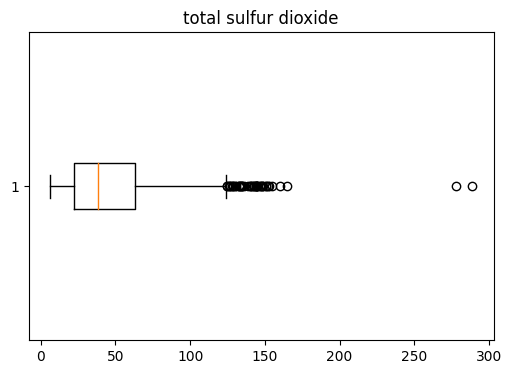

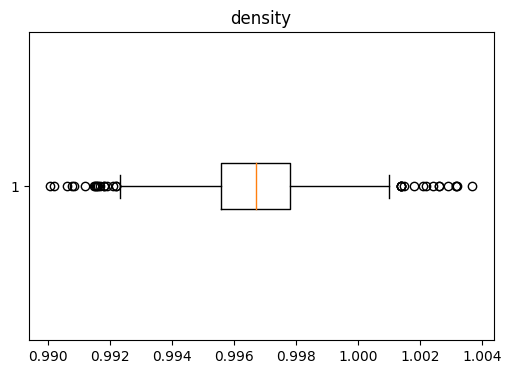

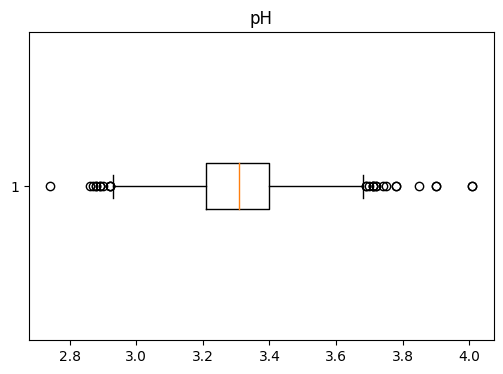

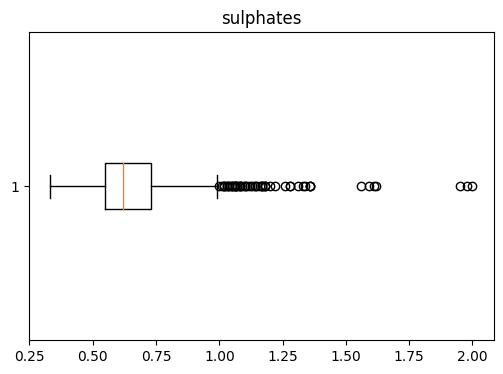

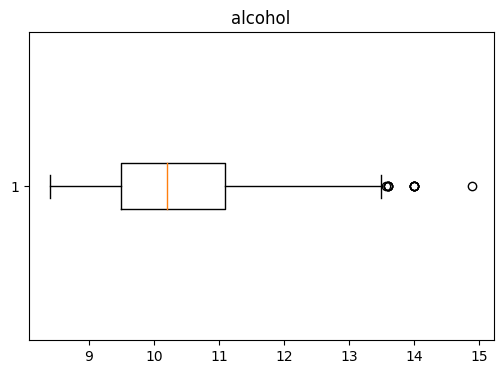


Outliers found using visual inspection with box plots:



fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
205            12.8              0.30         0.74             2.6      0.095   
243            15.0              0.21         0.44             2.2      0.075   
264            12.5              0.56         0.49             2.4      0.064   
294            13.3              0.34         0.52             3.2      0.094   
328            13.4              0.27         0.62             2.6      0.082   
...             ...               ...          ...             ...        ...   
1228            5.1              0.42         0.00             1.8      0.044   
1269            5.5              0.49         0.03             1.8      0.044   
1270            5.0              0.38         0.01             1.6      0.048   
1475            5.3              0.47         0.11             2.2      0.048   
1477            5.3              0.47         0.11             2.2      0.048   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
205                   9.0                  28.0  0.99940  3.20       0.77   
243                  10.0                  24.0  1.00005  3.07       0.84   
264                   5.0                  27.0  0.99990  3.08       0.87   
294                  17.0                  53.0  1.00140  3.05       0.81   
328                   6.0                  21.0  1.00020  3.16       0.67   
...                   ...                   ...      ...   ...        ...   
1228                 18.0                  88.0  0.99157  3.68       0.73   
1269                 28.0                  87.0  0.99080  3.50       0.82   
1270                 26.0                  60.0  0.99084  3.70       0.75   
1475                 16.0                  89.0  0.99182  3.54       0.88   
1477                 16.0                  89.0  0.99182  3.54       0.88   

        alcohol quality  
205   10.800000       7  
243    9.200000       7  
264   10.900000       5  
294    9.500000       6  
328    9.700000       6  
...         ...     ...  
1228  13.600000       7  
1269  14.000000       8  
1270  14.000000       6  
1475  13.566667       7  
1477  13.600000       7  

[475 rows x 12 columns]

In [ ]:
# Method 3: Visual inspection with box plots
columns_to_inspect = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                      'pH', 'sulphates', 'alcohol']
outliers_boxplot = pd.DataFrame(columns=data.columns)

for column in columns_to_inspect:
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[column], vert=False)
    plt.title(column)
    plt.show()

    outliers = data[(data[column] < (Q1[column] - 1.5 * IQR[column])) | (data[column] > (Q3[column] + 1.5 * IQR[column]))]
    outliers_boxplot = pd.concat([outliers_boxplot, outliers])
print("\nOutliers found using visual inspection with box plots:\n")
outliers_boxplot

In [ ]:
df = data_clean_iqr

In [ ]:
df.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
242             7.7             0.580         0.10             1.8      0.102   
1287            8.0             0.600         0.08             2.6      0.056   
1492            6.2             0.650         0.06             1.6      0.050   
623             7.9             0.510         0.25             2.9      0.077   
1347            7.2             0.655         0.03             1.8      0.078   
302             8.3             0.705         0.12             2.6      0.092   
1064            8.2             0.740         0.09             2.0      0.067   
1322            9.1             0.340         0.42             1.8      0.058   
1088           11.6             0.410         0.54             1.5      0.095   
362            11.9             0.580         0.66             2.5      0.072   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
242                  28.0                 109.0  0.99565  3.08       0.49   
1287                  3.0                   7.0  0.99286  3.22       0.37   
1492                  6.0                  18.0  0.99348  3.57       0.54   
623                  21.0                  45.0  0.99740  3.49       0.96   
1347                  7.0                  12.0  0.99587  3.34       0.39   
302                  12.0                  28.0  0.99940  3.51       0.72   
1064                  5.0                  10.0  0.99418  3.28       0.57   
1322                  9.0                  18.0  0.99392  3.18       0.55   
1088                 22.0                  41.0  0.99735  3.02       0.76   
362                   6.0                  37.0  0.99920  3.05       0.56   

      alcohol  quality  
242      9.80        6  
1287    13.00        5  
1492    11.95        5  
623     12.10        6  
1347     9.50        5  
302     10.00        5  
1064    11.80        6  
1322    11.40        5  
1088     9.90        7  
362     10.00        5

# **Visualizations**

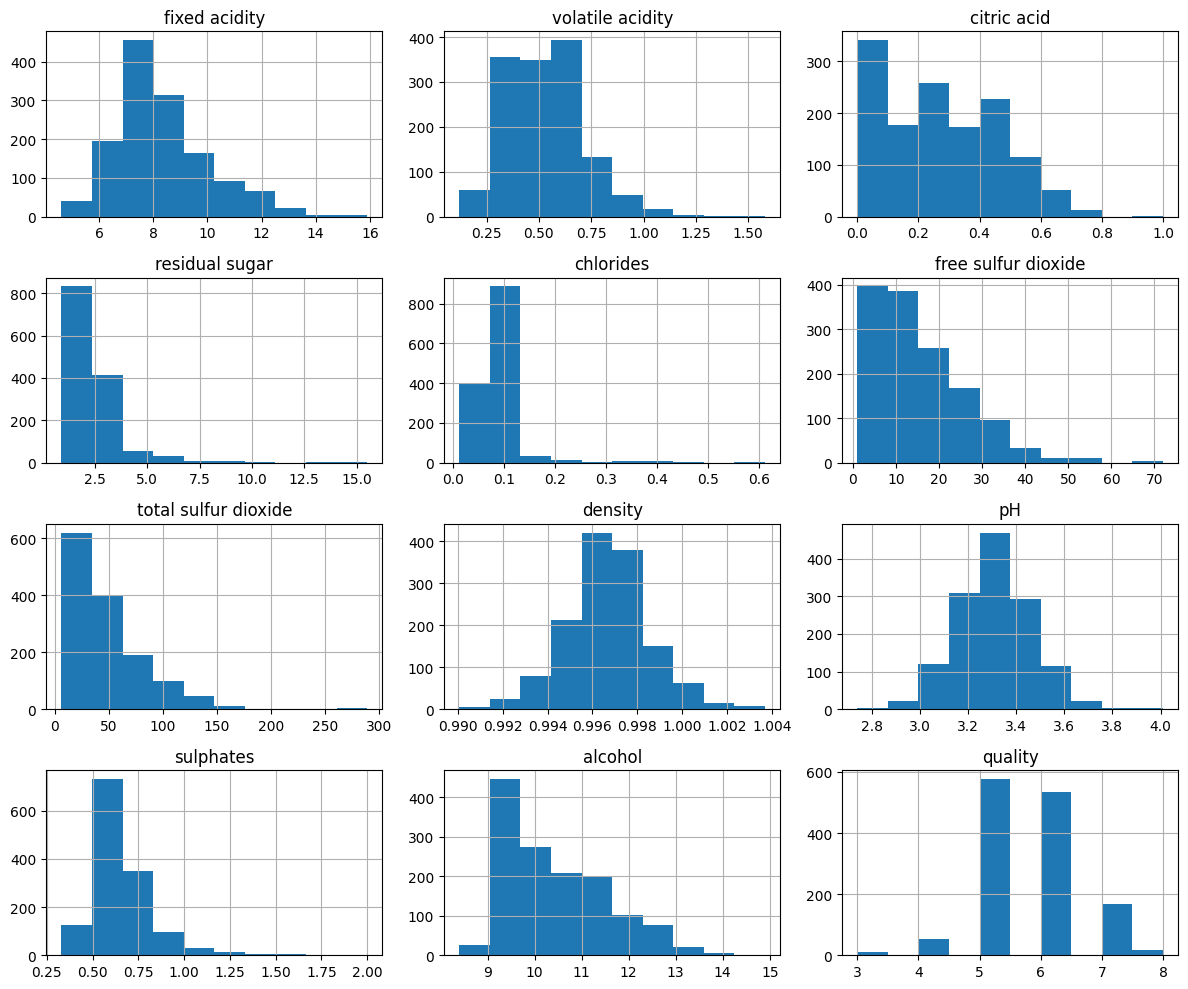

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizations

# 1. Histograms for each feature
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

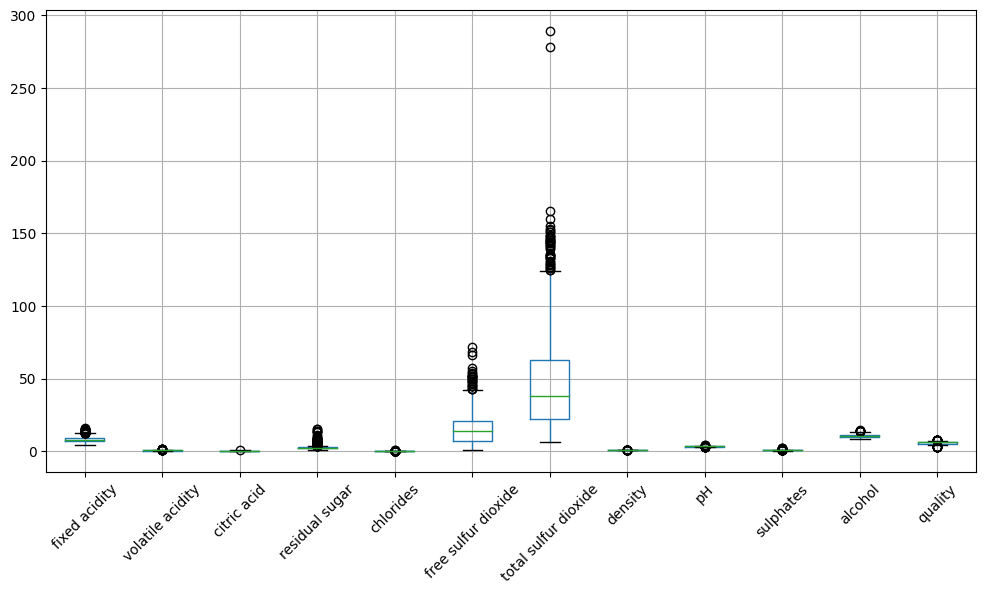

In [ ]:
# 2. Box plots for each feature
data.boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

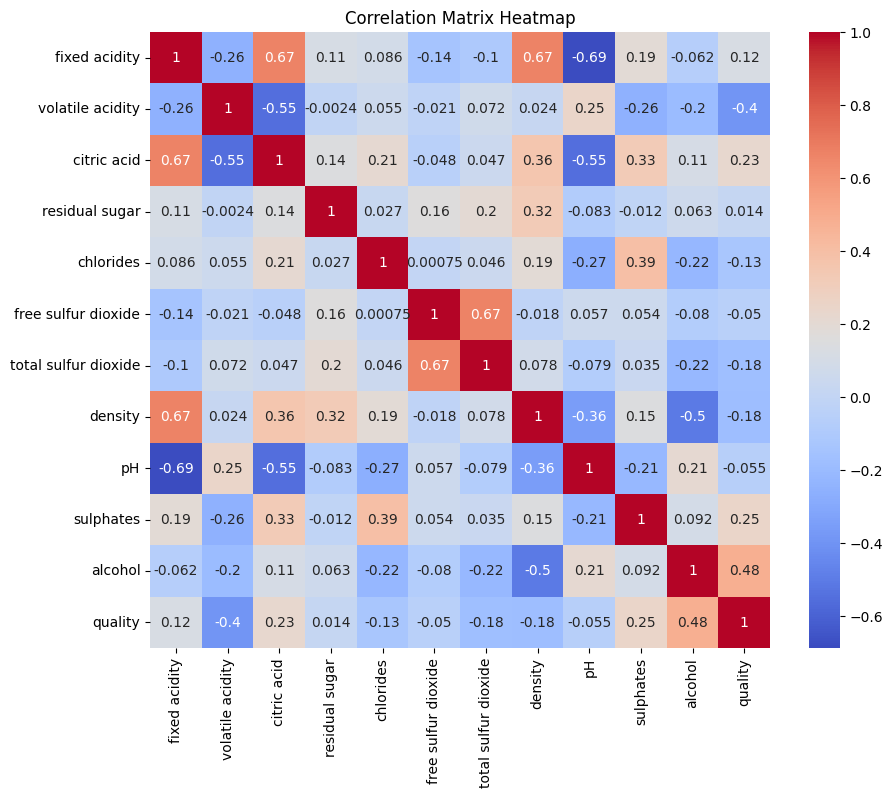

In [ ]:
# 3. Correlation matrix heatmap
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

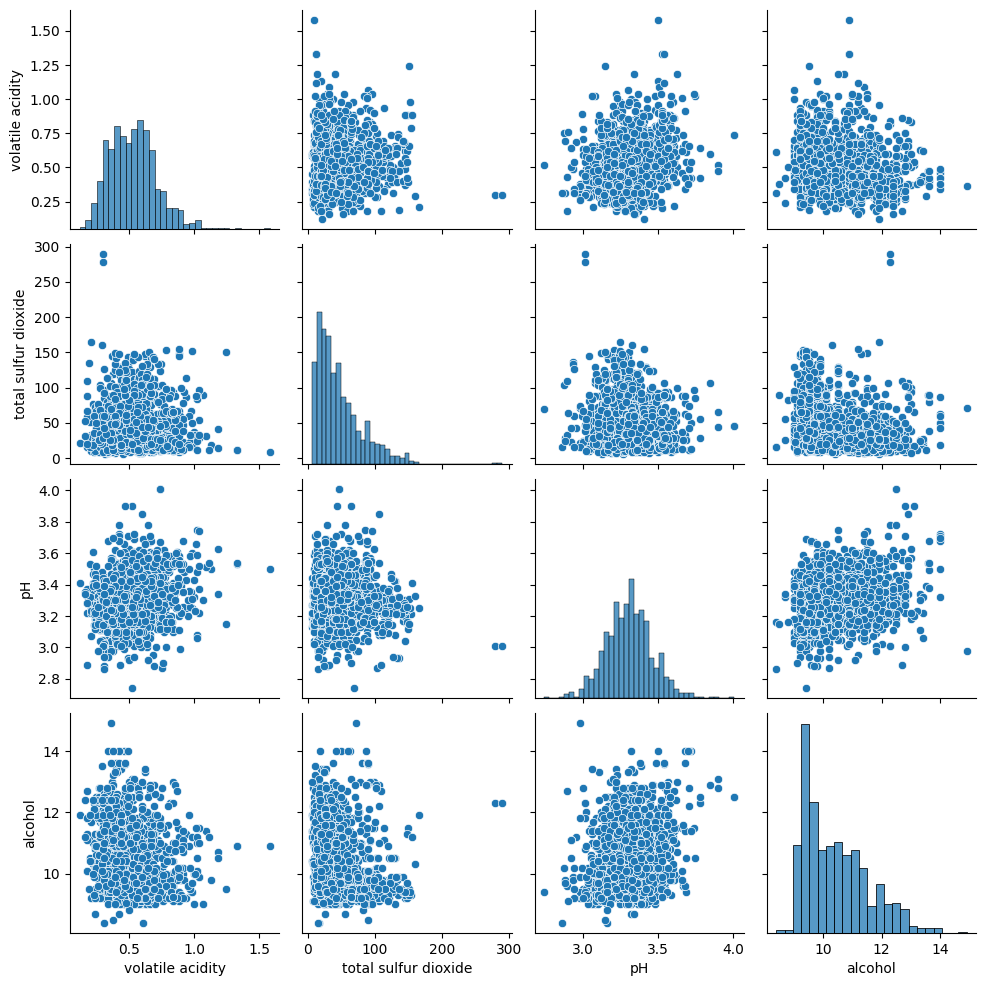

In [ ]:
# 4. Pairwise scatter plots for selected features
selected_features = ['volatile acidity', 'total sulfur dioxide', 'pH', 'alcohol']
sns.pairplot(data[selected_features])
plt.show()


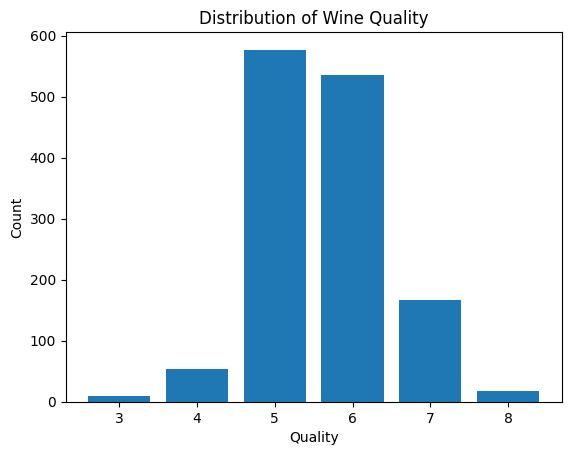

In [ ]:
# 5. Bar plot of wine quality counts
quality_counts = data['quality'].value_counts().sort_index()
plt.bar(quality_counts.index, quality_counts.values)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()


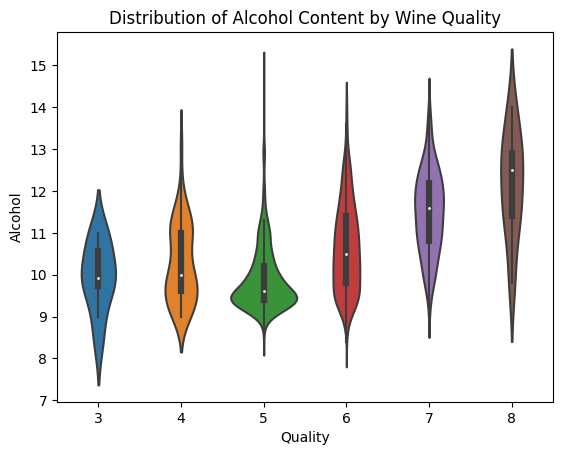

In [ ]:
# 6. Violin plot of wine quality distribution
sns.violinplot(x='quality', y='alcohol', data=data)
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Distribution of Alcohol Content by Wine Quality')
plt.show()

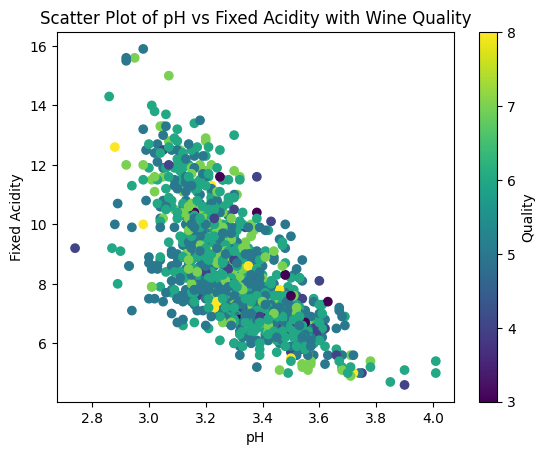

In [ ]:
# 7. Scatter plot of two features with color-coded wine quality
plt.scatter(data['pH'], data['fixed acidity'], c=data['quality'], cmap='viridis')
plt.colorbar(label='Quality')
plt.xlabel('pH')
plt.ylabel('Fixed Acidity')
plt.title('Scatter Plot of pH vs Fixed Acidity with Wine Quality')
plt.show()

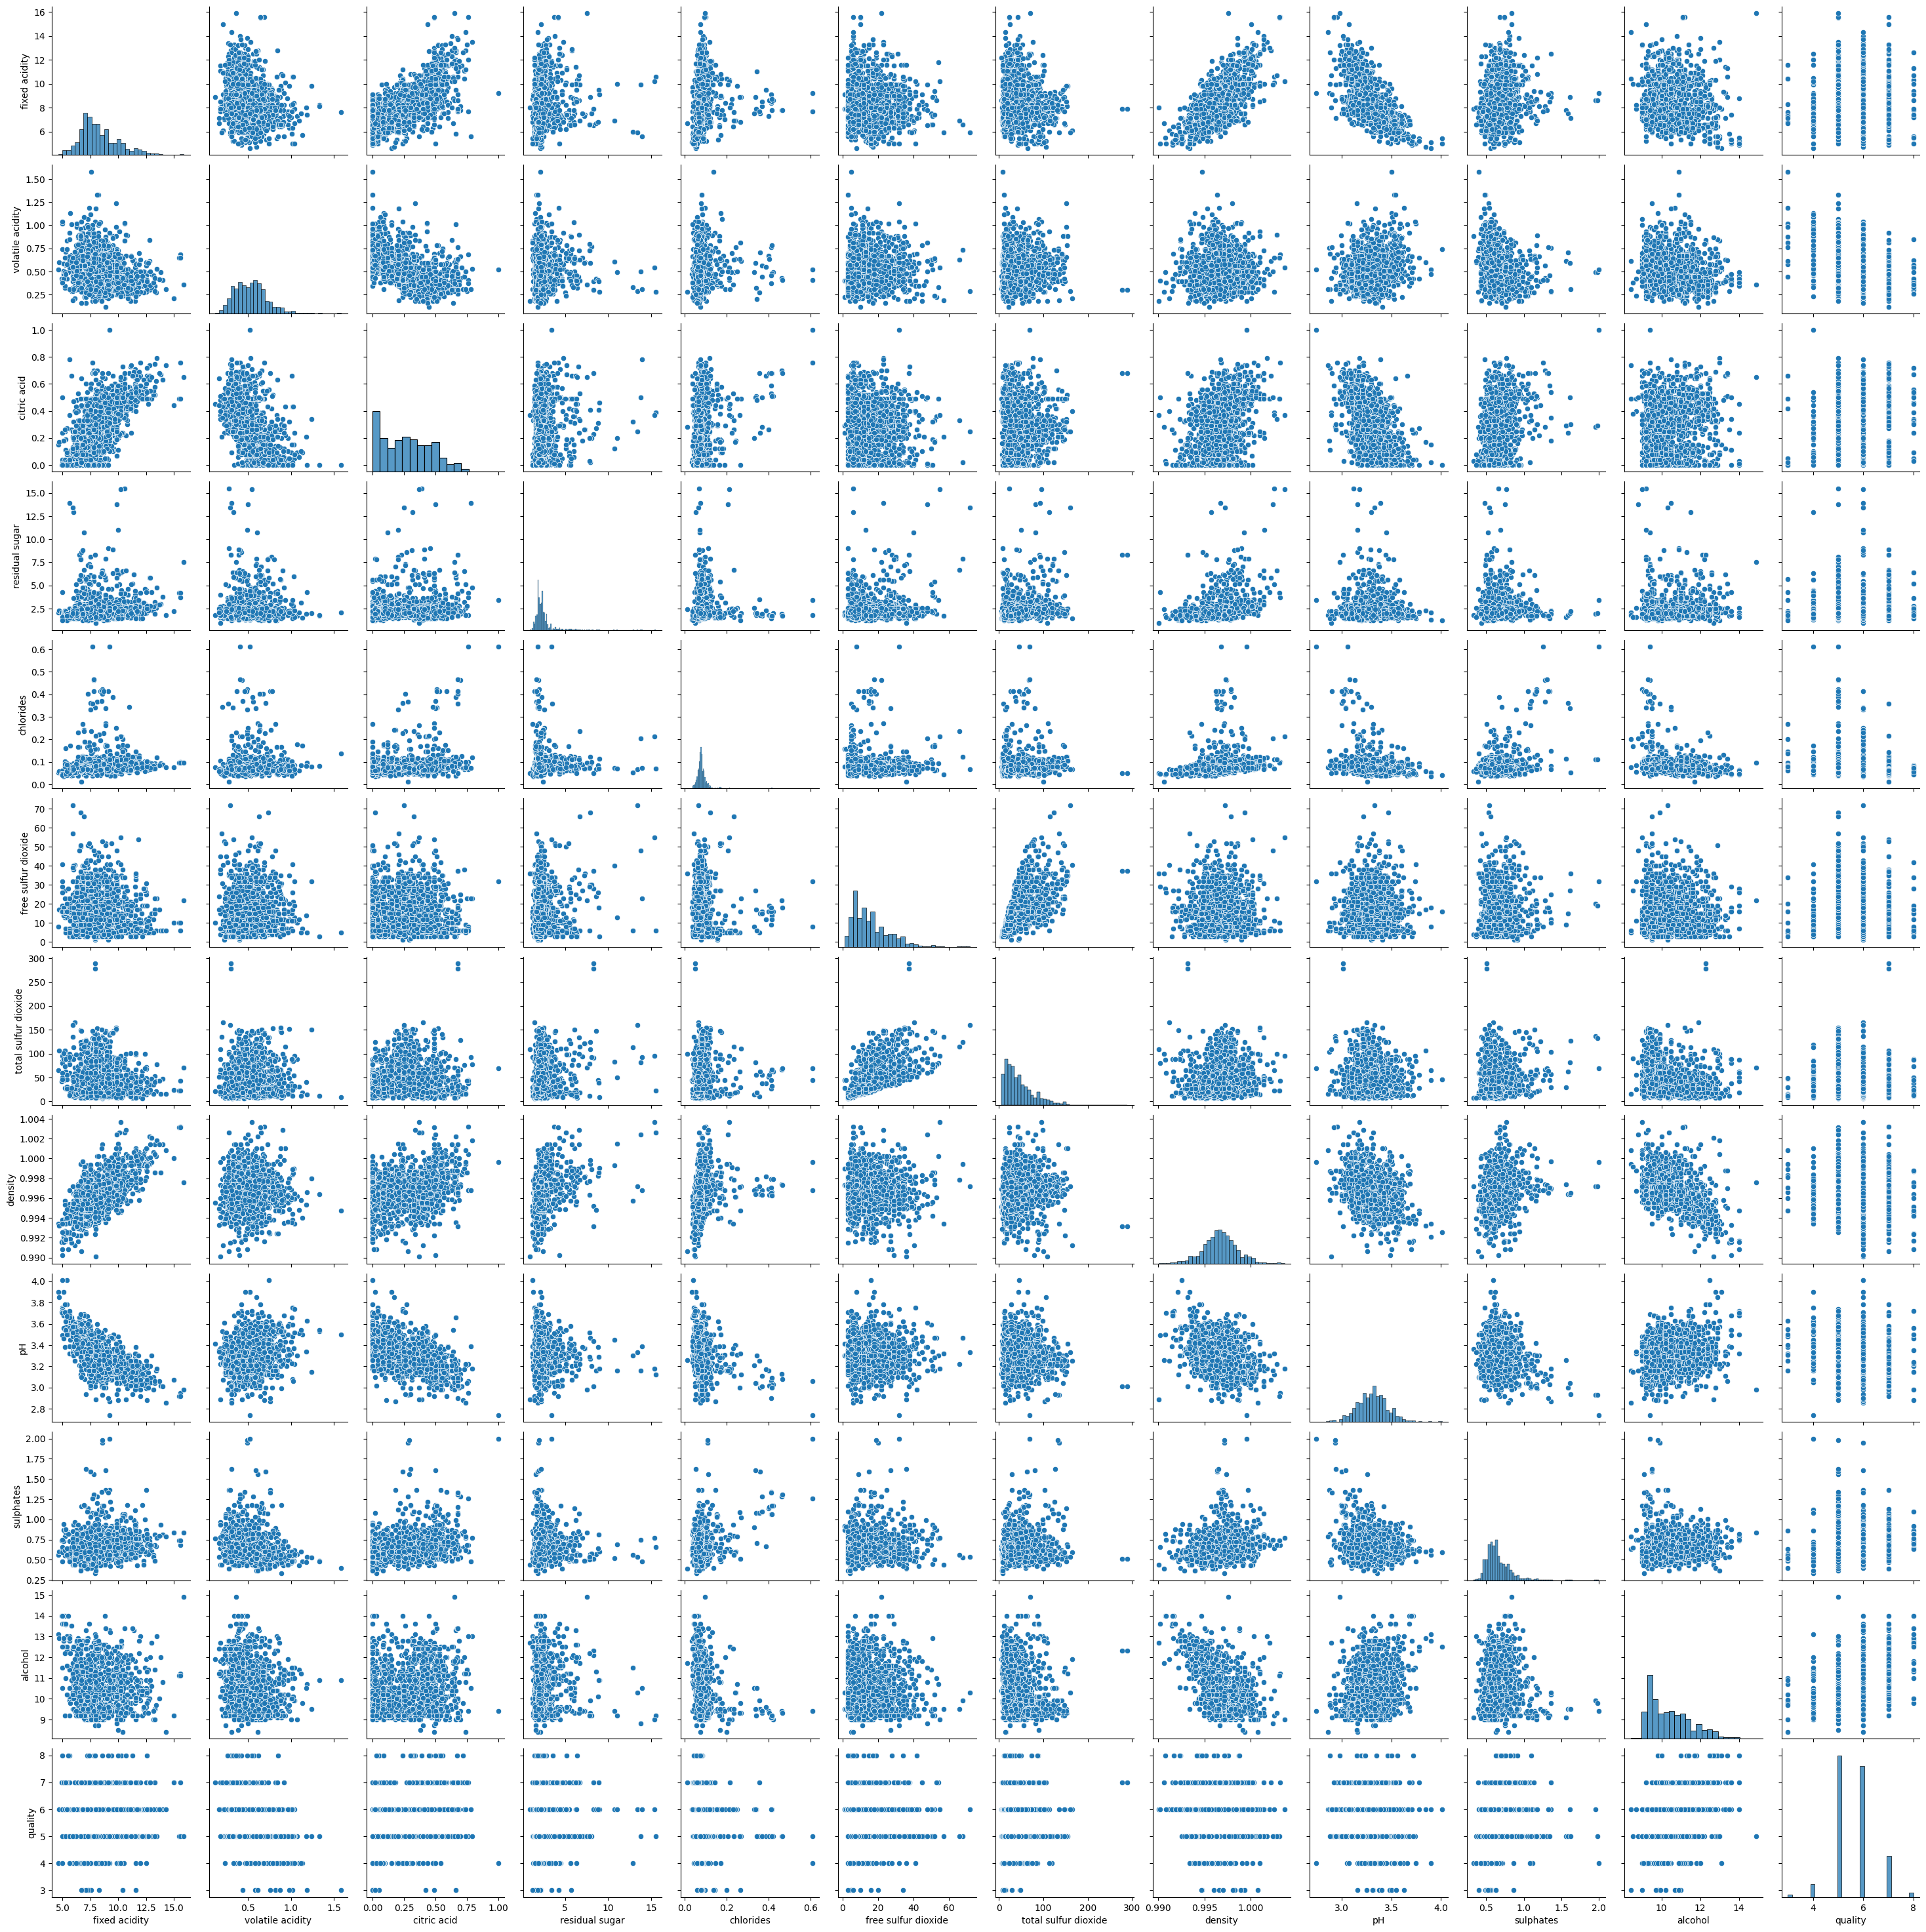

In [ ]:
# Additional Visualizations

# 8. Pairwise scatter plot matrix for all features
sns.pairplot(data)
plt.show()




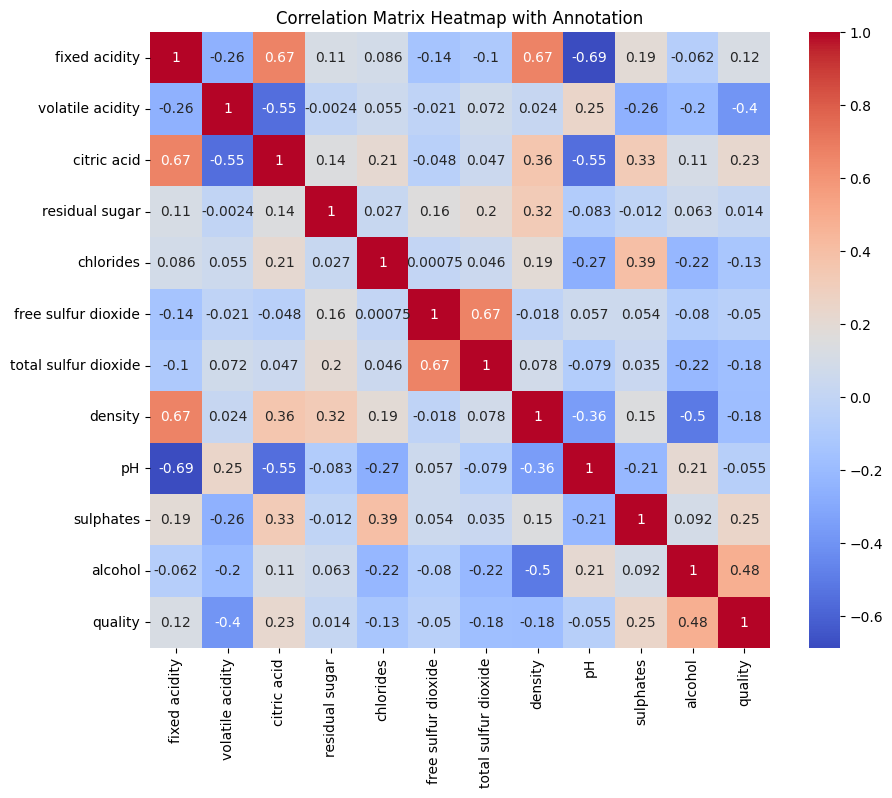

In [ ]:
# 9. Heatmap of correlation matrix with annotation
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap with Annotation")
plt.show()

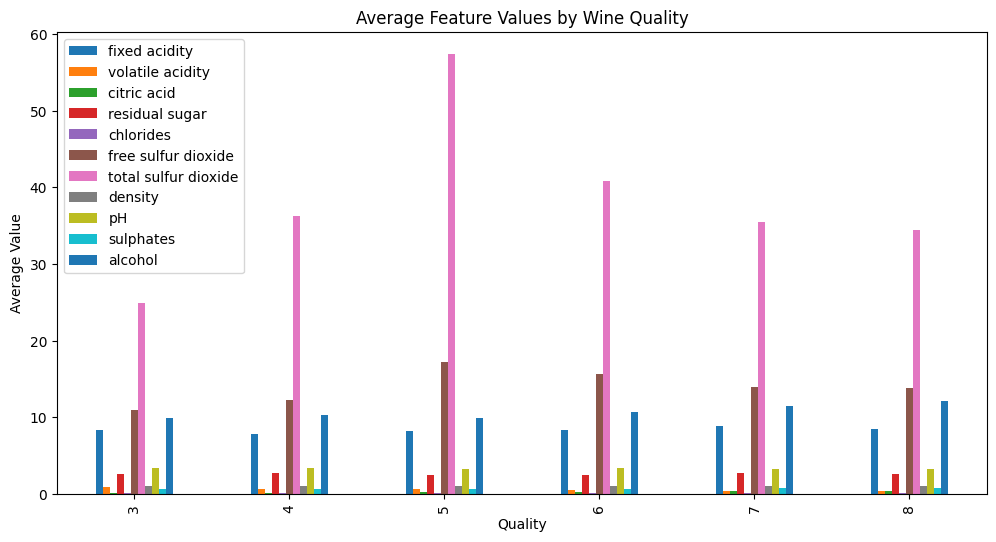

In [ ]:
# Calculate the average feature values by wine quality
average_features = data.groupby('quality').mean()

# Bar plot of average feature values
average_features.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Quality')
plt.ylabel('Average Value')
plt.title('Average Feature Values by Wine Quality')
plt.legend() #loc='upper right'
plt.show()


In [ ]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
5      9.4        5

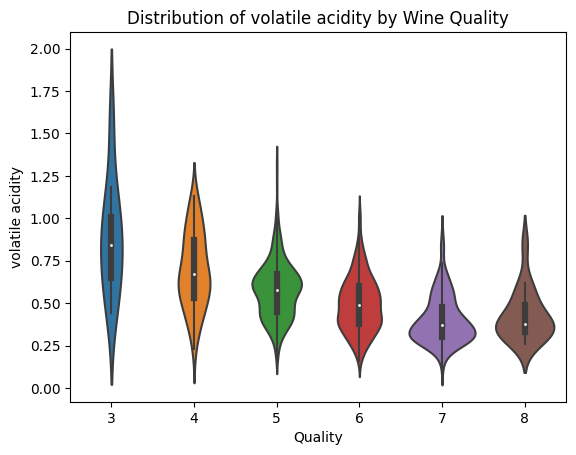

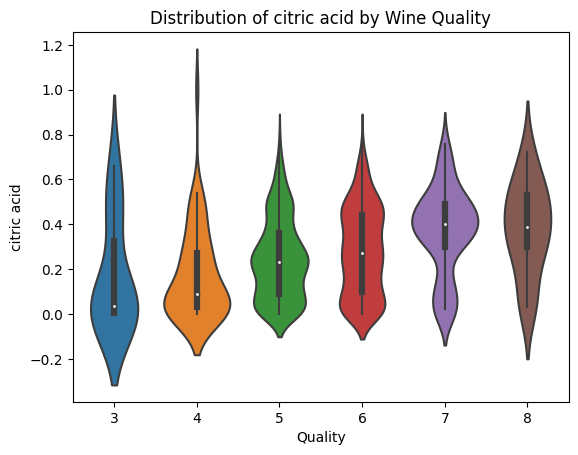

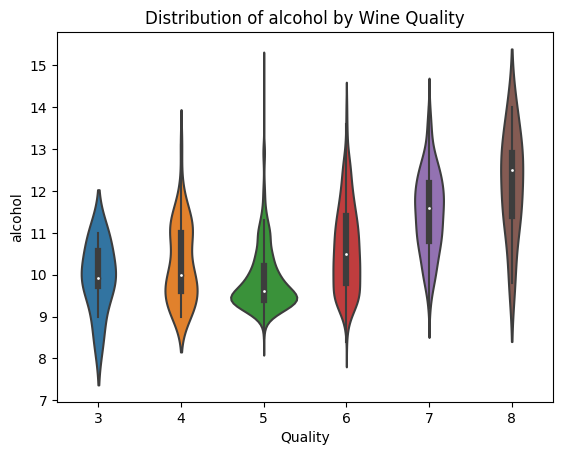

In [ ]:

# 11. Violin plot of multiple features by wine quality
selected_features = ['volatile acidity', 'citric acid', 'alcohol']
for feature in selected_features:
    sns.violinplot(x='quality', y=feature, data=data)
    plt.xlabel('Quality')
    plt.ylabel(feature)
    plt.title('Distribution of ' + feature + ' by Wine Quality')
    plt.show()


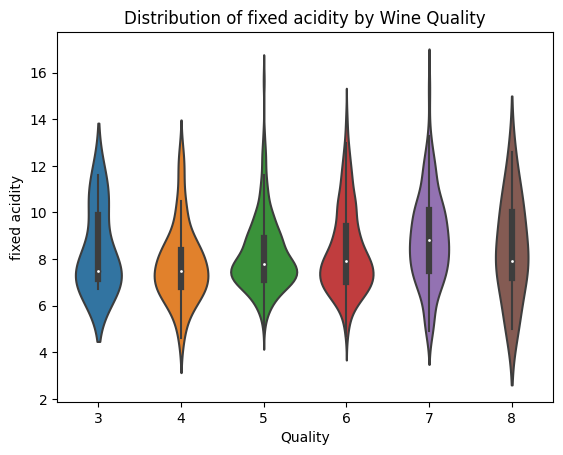

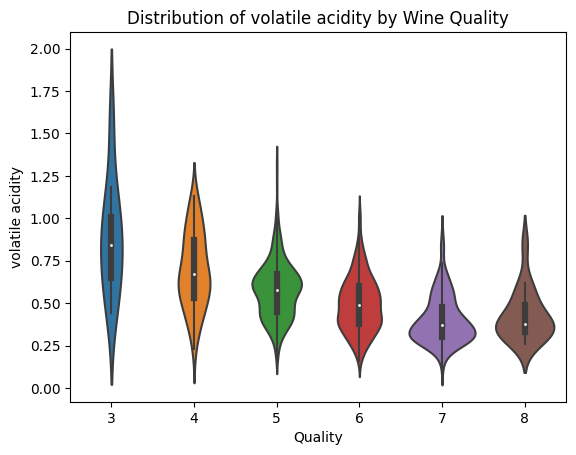

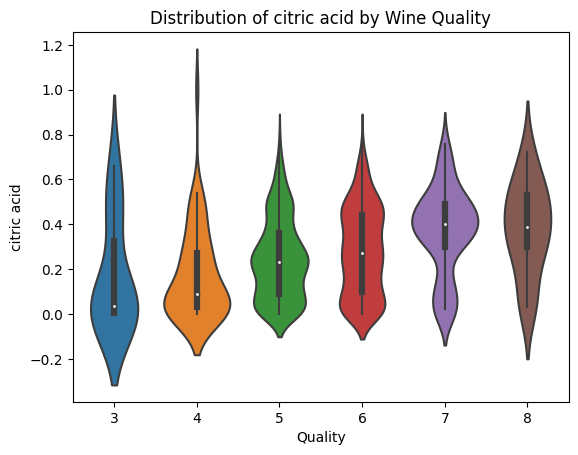

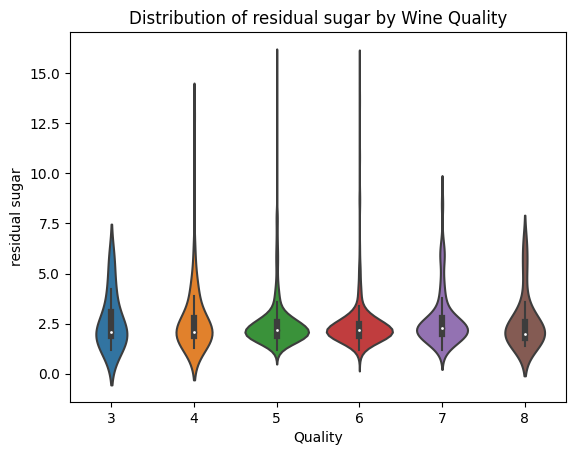

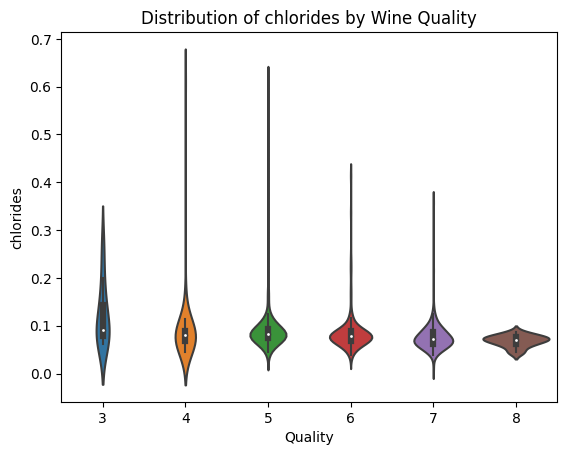

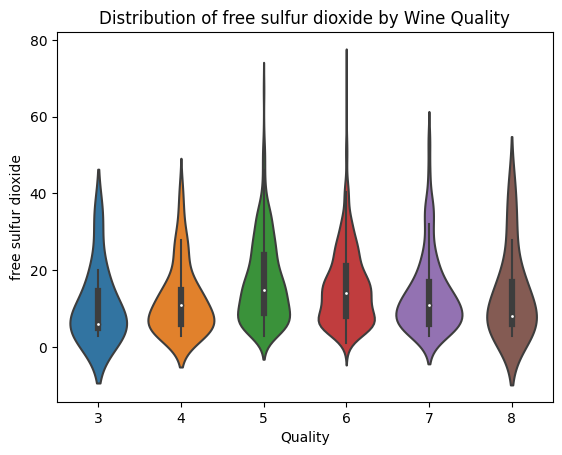

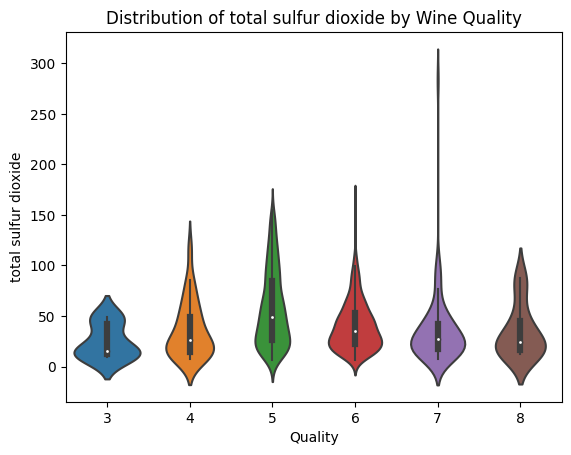

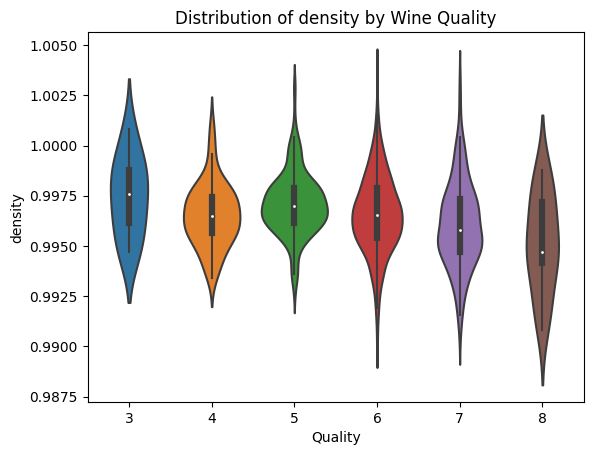

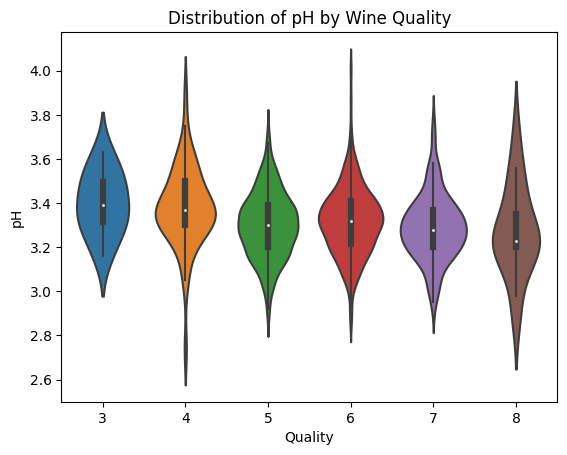

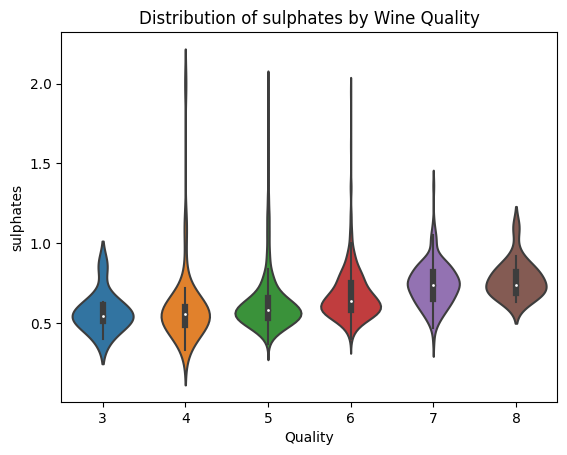

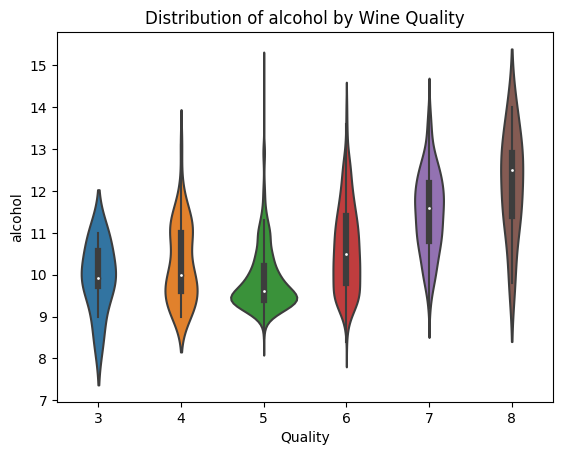

In [ ]:
# 1. Violin plot of each feature by wine quality
for feature in data.columns[:-1]:  # Exclude the last column ('quality')
    sns.violinplot(x='quality', y=feature, data=data)
    plt.xlabel('Quality')
    plt.ylabel(feature)
    plt.title(f'Distribution of {feature} by Wine Quality')
    plt.show()

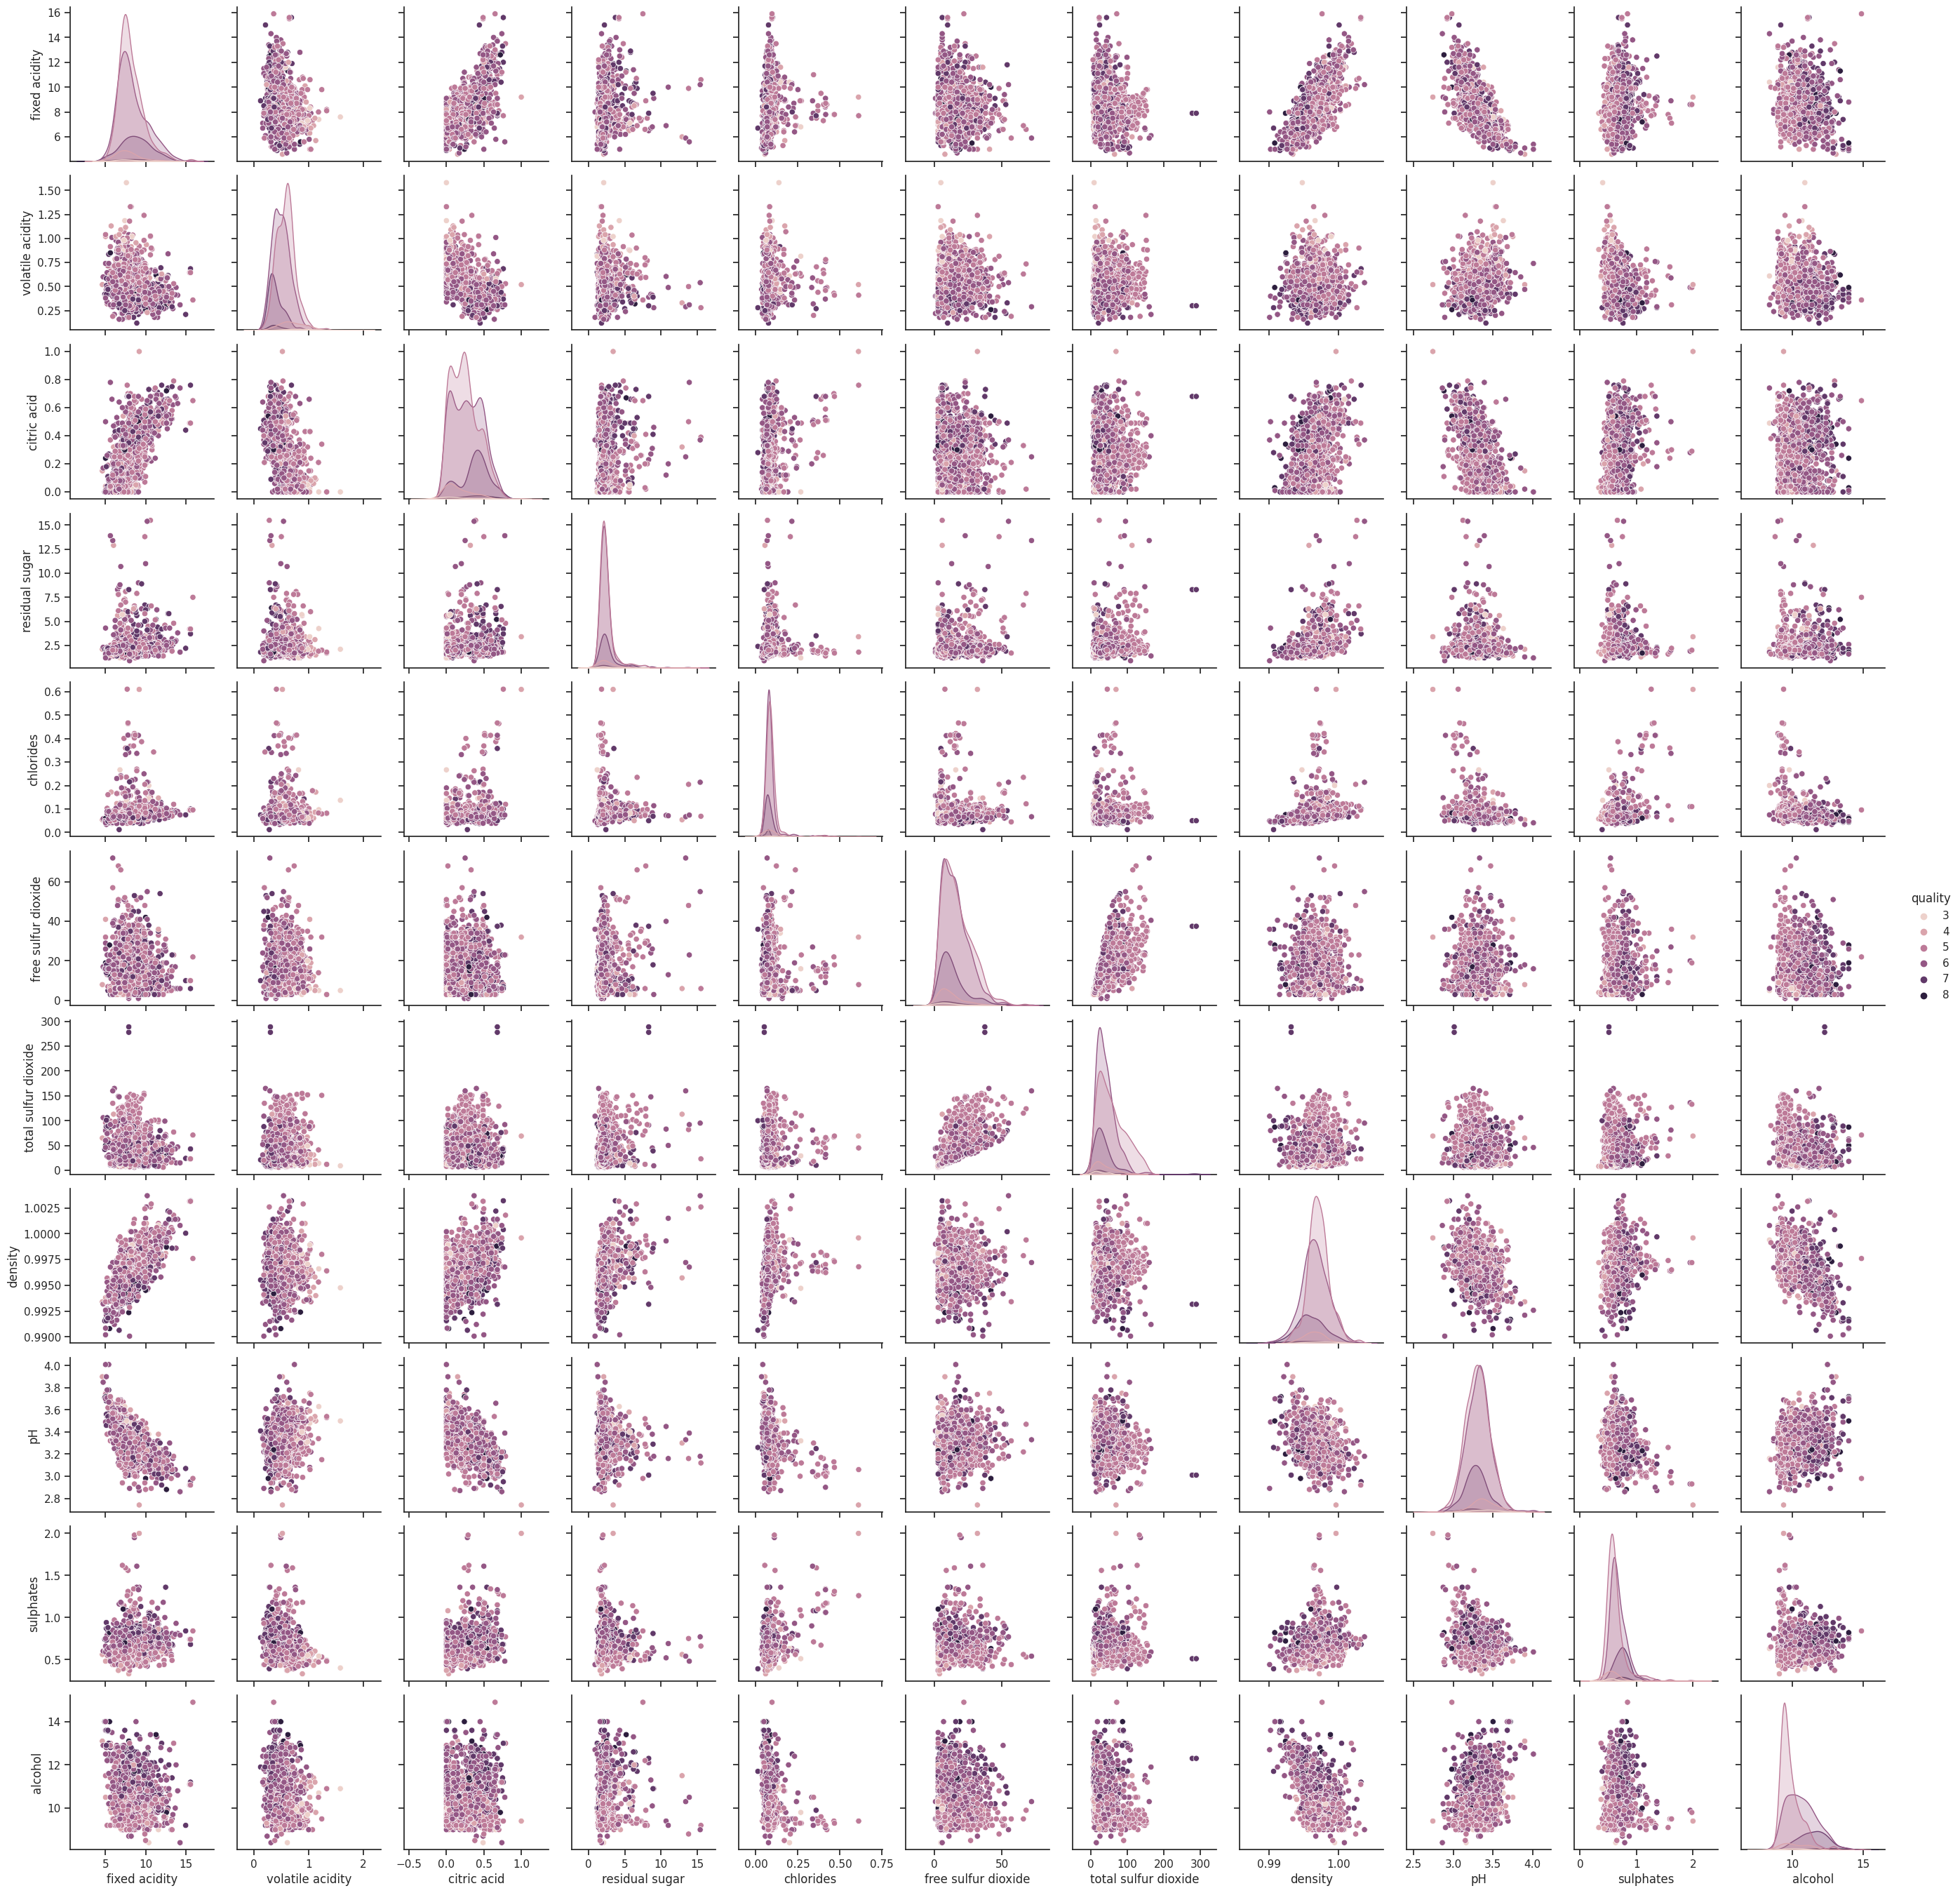

In [ ]:
# 2. Scatter matrix plot
sns.set(style='ticks')
sns.pairplot(data, hue='quality')
plt.show()

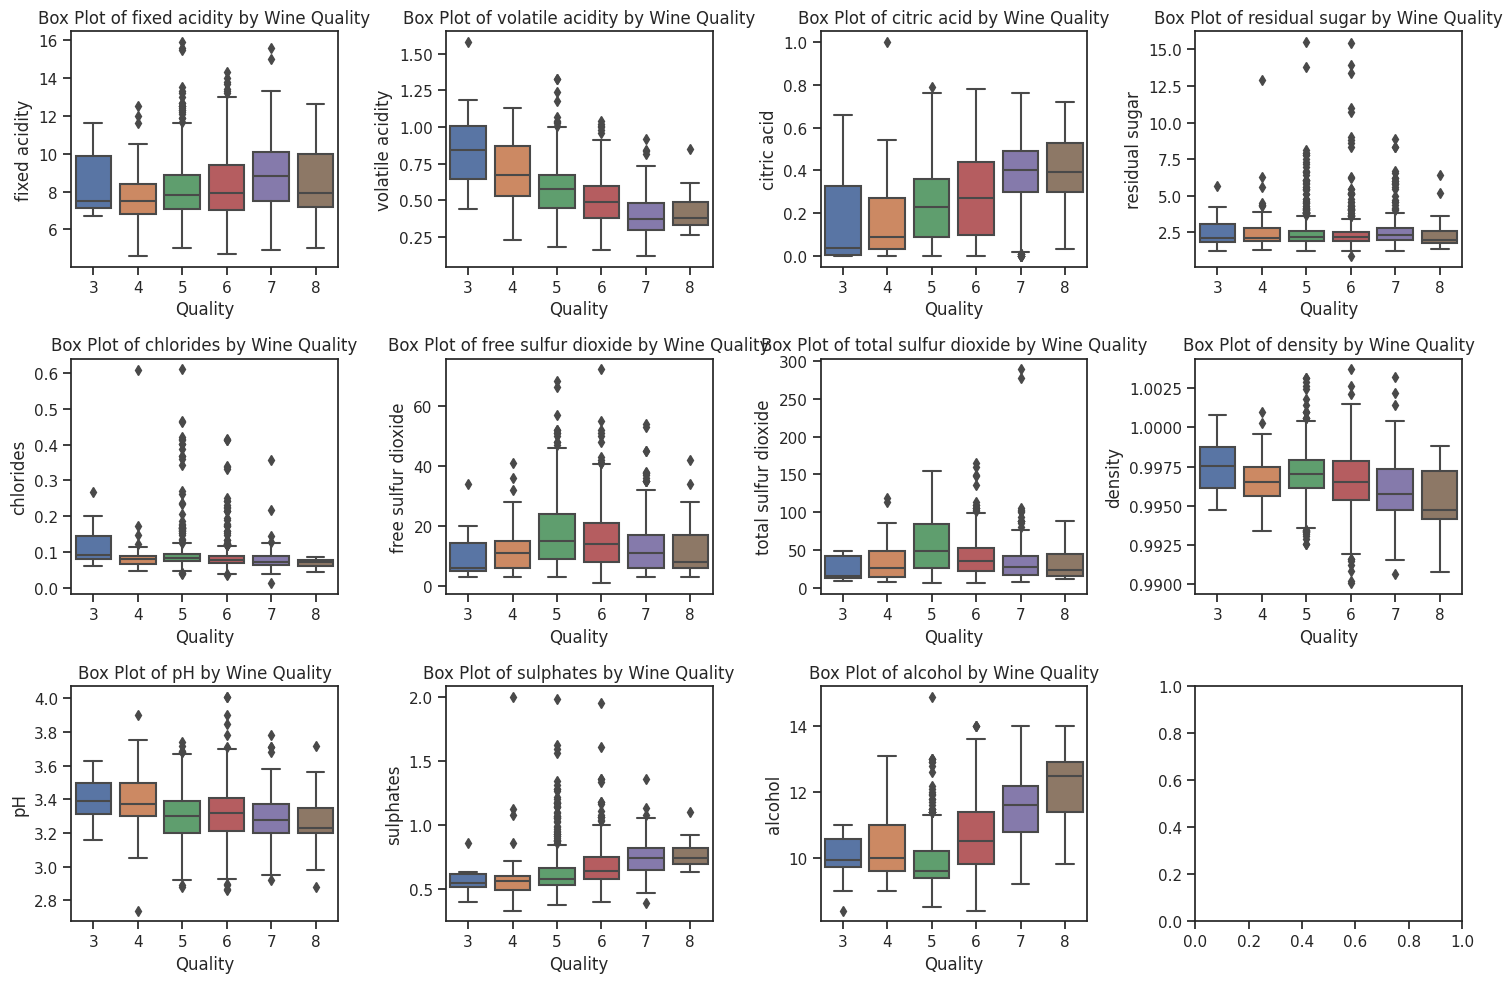

In [ ]:
# 3. Box plot of each feature by wine quality
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(data.columns[:-1]):
    sns.boxplot(x='quality', y=feature, data=data, ax=axes[i])
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel(feature)
    axes[i].set_title(f'Box Plot of {feature} by Wine Quality')

plt.tight_layout()
plt.show()

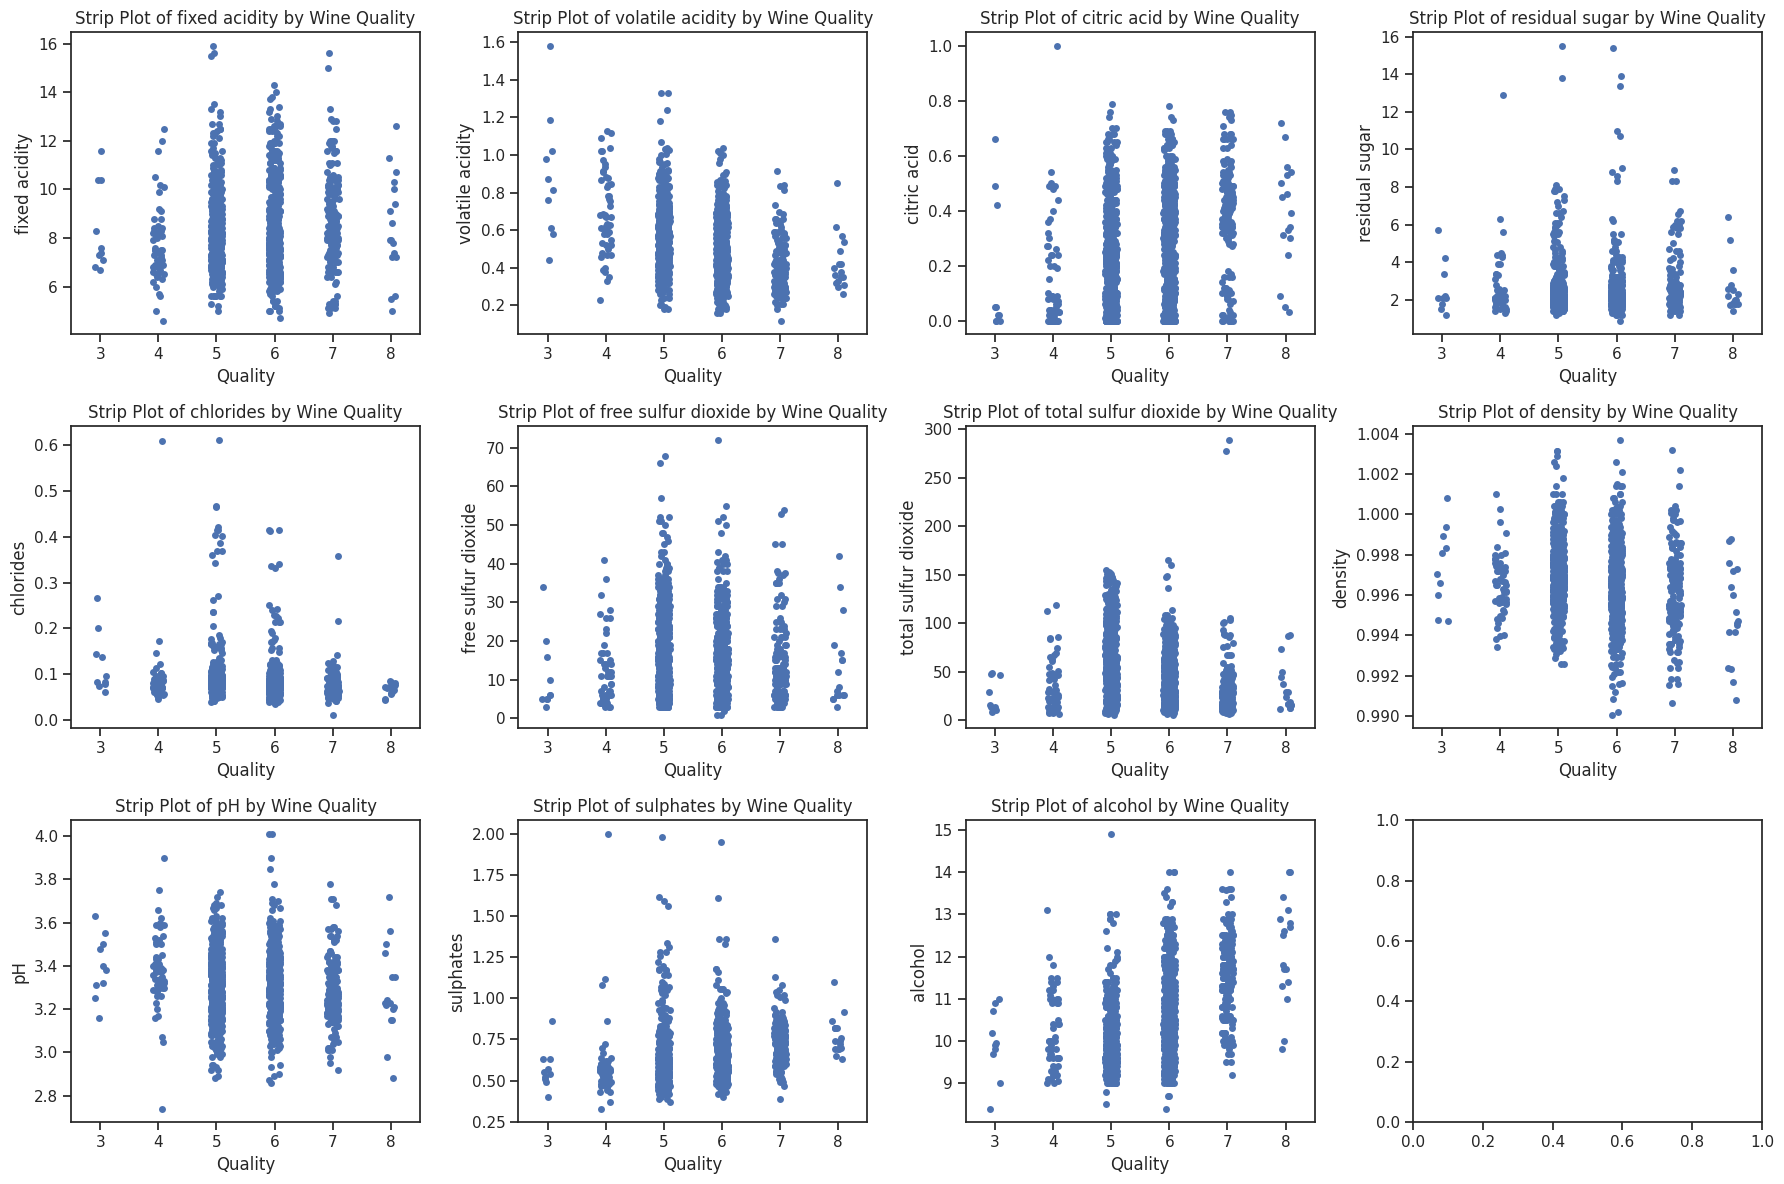

In [ ]:
# Strip plot of each feature by wine quality
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(data.columns[:-1]):
    sns.stripplot(x='quality', y=feature, data=data, ax=axes[i])
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel(feature)
    axes[i].set_title(f'Strip Plot of {feature} by Wine Quality')

plt.tight_layout()
plt.show()


# **Statistical Analysis**

In [ ]:
# Step 1: Load the necessary libraries
import scipy.stats as stats
# Step 3: Perform the t-test
high_quality = data[data['quality'] >= 7]['alcohol']
low_quality = data[data['quality'] <= 4]['alcohol']

t_statistic, p_value = stats.ttest_ind(high_quality, low_quality, equal_var=False)

# Step 4: Interpret the t-test results
alpha = 0.05

print(f'T-Statistic: {t_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

if p_value < alpha:
    print("The means of the 'alcohol' feature between high-quality and low-quality wines are significantly different.")
else:
    print("The means of the 'alcohol' feature between high-quality and low-quality wines are not significantly different.")


T-Statistic: 9.7117
P-Value: 0.0000
The means of the 'alcohol' feature between high-quality and low-quality wines are significantly different.


A p-value of 0 in a t-test indicates that the observed difference in means between the two groups (high-quality and low-quality wines) is extremely unlikely to occur by chance. **In other words, it suggests strong evidence against the null hypothesis, which states that there is no difference in means between the two groups**.

In practical terms, a p-value of 0 means that the difference in the "alcohol" feature between high-quality and low-quality wines is statistically significant. This implies that there is a significant difference in the average alcohol content between the two groups.

When the p-value is very small (e.g., 0 or close to 0), it is generally interpreted as strong evidence to reject the null hypothesis in favor of the alternative hypothesis. In this case, we reject the null hypothesis and conclude that there is a significant difference in the "alcohol" feature between high-quality and low-quality wines.

It's important to note that a p-value of 0 does not mean that the effect size or practical significance is large. It only indicates that the observed difference is highly unlikely to occur due to random chance. The effect size should be considered in conjunction with the p-value to understand the magnitude and practical relevance of the observed difference.

In [ ]:
# Step 1: Load the necessary libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Step 3: Perform the ANOVA test
model = ols('alcohol ~ quality', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Step 4: Interpret the ANOVA test results
alpha = 0.05

print(anova_table)

if anova_table['PR(>F)'][0] < alpha:
    print("The means of the 'alcohol' feature across different wine quality ratings are significantly different.")
else:
    print("The means of the 'alcohol' feature across different wine quality ratings are not significantly different.")


               sum_sq      df          F        PR(>F)
quality    366.867786     1.0  407.00843  2.278721e-79
Residual  1223.167751  1357.0        NaN           NaN
The means of the 'alcohol' feature across different wine quality ratings are significantly different.


In [ ]:
# Step 1: Load the necessary libraries
import statsmodels.api as sm


# Step 3: Define the dependent variable and independent variables
X = data.drop('quality', axis=1)  # Independent variables
y = data['quality']  # Dependent variable

# Step 4: Add a constant to the independent variables
X = sm.add_constant(X)

# Step 5: Fit the linear regression model
model = sm.OLS(y, X).fit()

# Step 6: Get the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     70.02
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          5.83e-124
Time:                        23:49:44   Log-Likelihood:                -1356.8
No. Observations:                1359   AIC:                             2738.
Df Residuals:                    1347   BIC:                             2800.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.2379 

In [ ]:
# Step 1: Load the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Step 3: Define the dependent variable and independent variables
X = data.drop('quality', axis=1)  # Independent variables
y = data['quality']  # Dependent variable

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.4310
R-squared: 0.3915


In the linear regression analysis, the output shows the mean squared error (MSE) and the coefficient of determination (R-squared) values as follows:

Mean Squared Error (MSE): 0.4310
The mean squared error measures the average squared difference between the actual wine quality values (y_test) and the predicted values (y_pred). In this case, the MSE value of 0.4310 indicates that, on average, the squared difference between the predicted and actual wine quality values is 0.4310. A lower MSE indicates better predictive performance, where a value of 0 would indicate a perfect fit to the data.

R-squared: 0.3915
The R-squared value, also known as the coefficient of determination, represents the proportion of the variance in the dependent variable (wine quality) that can be explained by the independent variables. The R-squared value of 0.3915 suggests that approximately 39.15% of the variability in the wine quality can be explained by the independent variables included in the model. This indicates a moderate level of predictive power in the model, but it also suggests that there might be other factors or variables not considered in the analysis that influence the wine quality.

Overall, these metrics provide an assessment of the performance and goodness of fit of the linear regression model. However, it's important to interpret these values in the context of the specific dataset and the underlying assumptions of the linear regression model. Further analysis and evaluation may be needed to fully understand the relationship between the independent variables and the wine quality.

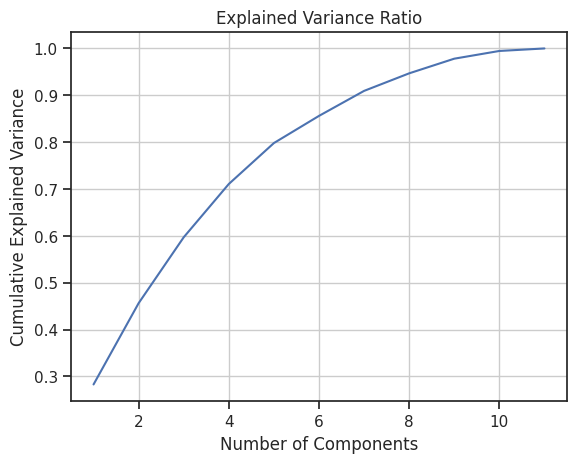

In [ ]:
# Step 1: Load the necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Step 3: Separate the features (independent variables) from the target variable (quality)
X = data.drop('quality', axis=1)  # Independent variables
y = data['quality']  # Dependent variable

# Step 4: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 6: Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 7: Plotting the Explained Variance Ratio
import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()


In [ ]:
# Step 1: Load the necessary libraries
from scipy.stats import mannwhitneyu


# Step 3: Separate the data into high-quality and low-quality wines
high_quality = data[data['quality'] > 6]['alcohol']
low_quality = data[data['quality'] < 6]['alcohol']

# Step 4: Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(high_quality, low_quality)

# Step 5: Print the results
print(f"Mann-Whitney U statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")


Mann-Whitney U statistic: 106188.5000
P-value: 0.0000


In [ ]:
# Step 1: Load the necessary libraries
import pandas as pd
from scipy.stats import ttest_ind



# Step 3: Select the required variables
pH_values = data['pH']
quality_values = data['quality']

# Step 4: Perform the t-test
quality_3_pH = pH_values[quality_values == 3]  # pH values for quality 3
quality_4_pH = pH_values[quality_values == 4]  # pH values for quality 4

t_statistic, p_value = ttest_ind(quality_3_pH, quality_4_pH)

# Step 5: Print the results
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")


T-Statistic: 0.2711
P-Value: 0.7872


In [ ]:
pH_values = data['pH']
quality_values = data['quality']

# Step 4: Perform the t-test
quality_5_pH = pH_values[quality_values == 5]  # pH values for quality 3
quality_6_pH = pH_values[quality_values == 6]  # pH values for quality 4

t_statistic, p_value = ttest_ind(quality_5_pH, quality_6_pH)

# Step 5: Print the results
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

T-Statistic: -1.8761
P-Value: 0.0609


In [ ]:
pH_values = data['pH']
quality_values = data['quality']

# Step 4: Perform the t-test
quality_7_pH = pH_values[quality_values == 7]  # pH values for quality 3
quality_8_pH = pH_values[quality_values == 8]  # pH values for quality 4

t_statistic, p_value = ttest_ind(quality_7_pH, quality_8_pH)

# Step 5: Print the results
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

T-Statistic: 0.4043
P-Value: 0.6865


# **Machine Learning Model**

**All Possible Machine Learning models for the redwine dataset**
**For Classification Tasks:**
  1. Logistic Regression
  2. Decision Tree
  3. Random Forest
  4. Support Vector Machines (SVM)
  5. K-Nearest Neighbors (KNN)
  6. Gradient Boosting (e.g., XGBoost, LightGBM)
  7. Naive Bayes
  8. Neural Networks (e.g., Multi-Layer Perceptron)
  
  **For regression tasks, you can consider the following models:**

  9. Linear Regression
  10. Decision Tree
  11. Random Forest
  12. Support Vector Regression (SVR)
  13. Gradient Boosting (e.g., XGBoost, LightGBM)
  14. Neural Networks (e.g., Multi-Layer Perceptron)

In [ ]:
# Step 1: Load the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Step 3: Split the data into input features (X) and target variable (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

# Step 5: Create a Random Forest Classifier and fit the model on the training data
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Step 7: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Step 8: Print the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report)


Accuracy: 0.5956
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.64      0.74      0.69       112
           6       0.56      0.60      0.58       108
           7       0.58      0.44      0.50        32
           8       0.00      0.00      0.00         4

    accuracy                           0.60       272
   macro avg       0.30      0.30      0.29       272
weighted avg       0.55      0.60      0.57       272



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Step 1: Load the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Step 3: Split the data into input features (X) and target variable (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create a Logistic Regression model and fit the model on the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = logreg.predict(X_test)

# Step 7: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Step 8: Print the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report)


Accuracy: 0.5846
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.67      0.74      0.70       120
           6       0.51      0.68      0.58       103
           7       0.00      0.00      0.00        31
           8       0.00      0.00      0.00         3

    accuracy                           0.58       272
   macro avg       0.20      0.24      0.21       272
weighted avg       0.49      0.58      0.53       272



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
# Step 1: Load the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# Step 3: Split the data into input features (X) and target variable (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create a Decision Tree Classifier and fit the model on the training data
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = decision_tree.predict(X_test)

# Step 7: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Step 8: Print the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report)


Accuracy: 0.4890
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.60      0.58      0.59       120
           6       0.45      0.50      0.47       103
           7       0.38      0.39      0.38        31
           8       0.00      0.00      0.00         3

    accuracy                           0.49       272
   macro avg       0.24      0.24      0.24       272
weighted avg       0.48      0.49      0.48       272



In [ ]:
# Step 1: Load the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Step 3: Split the data into input features (X) and target variable (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create a Support Vector Machine Classifier and fit the model on the training data
svm = SVC()
svm.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = svm.predict(X_test)

# Step 7: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Step 8: Print the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report)


Accuracy: 0.4816
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.67      0.36      0.47       120
           6       0.42      0.84      0.56       103
           7       1.00      0.03      0.06        31
           8       0.00      0.00      0.00         3

    accuracy                           0.48       272
   macro avg       0.35      0.21      0.18       272
weighted avg       0.57      0.48      0.43       272



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Step 1: Load the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# Step 3: Split the data into input features (X) and target variable (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create a K-Nearest Neighbors Classifier and fit the model on the training data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = knn.predict(X_test)

# Step 7: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Step 8: Print the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report)


Accuracy: 0.4706
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       1.00      0.09      0.17        11
           5       0.52      0.60      0.56       120
           6       0.40      0.45      0.42       103
           7       0.50      0.29      0.37        31
           8       0.00      0.00      0.00         3

    accuracy                           0.47       272
   macro avg       0.40      0.24      0.25       272
weighted avg       0.48      0.47      0.45       272



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Step 1: Load the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Step 3: Split the data into input features (X) and target variable (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create a Linear Regression model and fit the model on the training data
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = reg_model.predict(X_test)

# Step 7: Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 8: Print the evaluation results
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.4310
R-squared: 0.3915


In [ ]:
# Step 1: Load the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Step 3: Split the data into input features (X) and target variable (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create a Decision Tree Regressor model and fit the model on the training data
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = tree_model.predict(X_test)

# Step 7: Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 8: Print the evaluation results
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.8272
R-squared: -0.1678


In [ ]:
# Step 1: Load the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError



# Step 3: Split the data into input features (X) and target variable (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Step 7: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError(), MeanAbsoluteError()])

# Step 8: Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Step 9: Evaluate the model on the test data
loss, mse, mae = model.evaluate(X_test_scaled, y_test)

# Step 10: Print the evaluation results
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 20.1715 - mean_squared_error: 20.1715 - mean_absolute_error: 4.2561
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 5.4736 - mean_squared_error: 5.4736 - mean_absolute_error: 1.8996
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 2.8549 - mean_squared_error: 2.8549 - mean_absolute_error: 1.3298
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 2.1099 - mean_squared_error: 2.1099 - mean_absolute_error: 1.1474
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 1.7972 - mean_squared_error: 1.7972 - mean_absolute_error: 1.0589
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 1.6029 - mean_squared_error: 1.6029 - mean_absolute_error: 0.9986
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 1.4470 - mean_squared_error: 1.4470 - mean_absolute_error: 0.9487
Epoch 8/100
34/34 [======

In [ ]:
print(f"R-squared: {r2:.4f}")

R-squared: -0.1678
